<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/6_1_using_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

'2.8.0'

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 710, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 710 (delta 174), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (710/710), 38.09 MiB | 35.98 MiB/s, done.
Resolving deltas: 100% (367/367), done.


In [3]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *

# 단어 임베딩 사용하기

임베딩은 단어와 벡터를 연관짓는 방법이다. 원핫 인코딩은 희소(대부분 0으로 채워짐)하고 고차원입니다(딕셔너리에 있는 단어수와 차원이 같음) 반면 단어 임베딩은 저차원 실수형 벡터

In [ ]:
from keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

# 임의의 모델을 생성
model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen)) # 출력값 (samples, maxlen, 8)

model.add(Flatten()) # 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 변형.

model.add(Dense(1, activation='sigmoid')) # sigmoid 를 사용해 이진분류 (부정 = 0, 긍정 = 1)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) # 모델 컴파일
model.summary() # 모델 구조 요약

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6637 - acc: 0.6340 - val_loss: 0.6074 - val_acc: 0.7020
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5348 - acc: 0.7542 - val_loss: 0.5219 - val_acc: 0.7352
Epoch 3/10
625/625 [==============================

# 사전훈련된 단어 임베딩 하기
데이터가 부족하면 임베딩을 진행하는데 어려움이 있다 그렇기 때문에 임베딩을 학습하는 대신 이미 학습이 완료되어 있는 임베딩 벡터를 불러와서 쓸수 있다. 이는 우리가 사용하는 데이터에 맞춰진 임베딩은 아닌 일반적인 임베딩이다 

In [4]:
# 학습에 사용할 imdb 데이터셋을 가져오고 전처리
from tensorflow.keras.datasets import imdb

# FCN : 흔히 사용하는 Dense layer
max_features = 500 # 많은 단어를 사용할 수록 성능 향상 -> 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다
max_len = 100 # 문장안에 존재할 최대 단어수
# 문장 -> (단어의 개수, 각 단어의 벡터길이)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) # 몇개의 단어를 사용할 것인가
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print('패딩 전:', x_train.shape, y_test.shape)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = max_len)
print('패딩 후:', x_train.shape, y_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,) (25000,) (25000,)
패딩 전: (25000,) (25000,)
패딩 후: (25000, 100) (25000,)


In [12]:
word2index = imdb.get_word_index()
index2word = {}
for word, idx in word2index.items():
  index2word[idx+3] = word

1654784/1641221 [==============================] - 0s 0us/step


In [5]:
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY
To: /content/glove.6B.zip
100% 862M/862M [00:10<00:00, 82.5MB/s]


In [6]:
! unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [7]:
# 임베딩 전처리 각각의 단어와 이에 상응하는 벡터(100차원, 200차원,300차원 등등)를 배당하는(매핑) 인덱스를 만든다.
word2embedding = {}
f = open('/content/glove.6B.100d.txt', encoding = 'utf8')
for line in f:
  word = line.split()[0] # 가장 첫번째 단어,
  vec = line.split()[1:] # 그 후는 단어에 대한 벡터
  vec = np.asarray(vec, dtype = 'float32') # 문자였던 것('') 실수로 변환, asarray -> 리스트를 벡터로 변환
  #print(word, len(vec), vec)
  #break
  word2embedding[word] = vec
f.close()
len(word2embedding) # 40만개의 단어

400000

## 임베딩 메트릭스 생성(임베딩 층에 적용시킬 w에 해당하는 행렬을 제작하는것)
## 이후 모델에 메트릭스를 적용해서 훈련

In [24]:
# 임베딩 적용할 모델 생성
def create_embeded_model(max_len, max_features, emb_dims):
  x = layers.Input(shape = max_len)
  y = layers.Embedding(max_features, emb_dims)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(32, activation = 'relu')(y)
  y = layers.Dense(1, activation = 'sigmoid')(y) # 이진분류
  return models.Model(x, y)

In [25]:
model = create_embeded_model(max_len, max_features, 100)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 임베딩 메트릭스
embed_mx = np.zeros((max_features, 100))
# 매트릭스의 크기 : (500, 100)

for idx in range(4, 504):
  word = index2word[idx]
  embed = word2embedding.get(word) # 딕셔너리.get 함수는 없으면 none값 반환
  #print(word, embed)
  if embed is not None:
    embed_mx[idx-4] = embed

In [33]:
model.layers[1].set_weights([embed_mx]) # 가중치를 Glove 값으로 초기화(위에서 제작한 메트릭스 적용)

In [34]:
# 컴파일 및 학습
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 2.9069 - acc: 0.5313 - val_loss: 1.1635 - val_acc: 0.5768
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.9753 - acc: 0.6425 - val_loss: 0.9187 - val_acc: 0.6448
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6628 - acc: 0.7286 - val_loss: 1.0386 - val_acc: 0.6394
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.5155 - acc: 0.7840 - val_loss: 0.6955 - val_acc: 0.7138
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4192 - acc: 0.8220 - val_loss: 0.7307 - val_acc: 0.7104
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3493 - acc: 0.8508 - val_loss: 0.7263 - val_acc: 0.7290
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2966 - acc: 0.8759 - val_loss: 0.6765 - val_acc: 0.7436
Epoch 8/20
625/625 [==============================] - 2s 3ms/step - loss: 0.

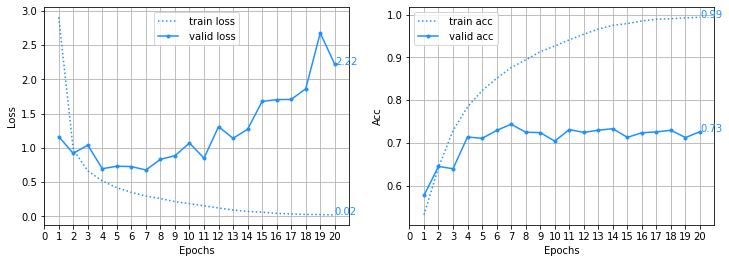

In [35]:
# 학습 결과 그래프 그리기
from plot_result import plot_lcurve
plot_lcurve([history], [''], ['dodgerblue'])

In [ ]:
# 임베딩 적용 전의 학습결과 그래프와 비교해보자.

## 임베딩 적용 전의 학습 결과 그리기

In [28]:
# 모델 생성
def create_model(max_len, max_features, emb_dims):
  x = layers.Input(shape = max_len)
  y = layers.Embedding(max_features, emb_dims)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(32, activation = 'relu')(y)
  y = layers.Dense(1, activation = 'sigmoid')(y) # 이진분류
  return models.Model(x, y)

In [29]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 컴파일 및 학습
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history2 = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.5223 - acc: 0.7248 - val_loss: 0.4446 - val_acc: 0.7948
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3659 - acc: 0.8376 - val_loss: 0.4752 - val_acc: 0.7818
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2404 - acc: 0.9015 - val_loss: 0.5765 - val_acc: 0.7640
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1327 - acc: 0.9492 - val_loss: 0.7664 - val_acc: 0.7538
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0613 - acc: 0.9776 - val_loss: 1.1107 - val_acc: 0.7360
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0310 - acc: 0.9894 - val_loss: 1.3304 - val_acc: 0.7344
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0199 - acc: 0.9931 - val_loss: 1.5965 - val_acc: 0.7394
Epoch 8/20
625/625 [==============================] - 2s 4ms/step - loss: 0.

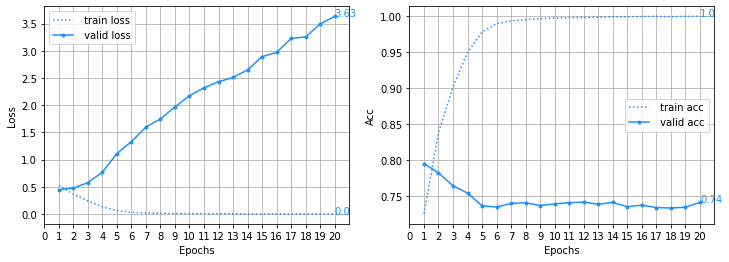

In [31]:
# 학습 결과 그래프 그리기
from plot_result import plot_lcurve
plot_lcurve([history2], [''], ['dodgerblue'])

In [ ]:
# 임베딩 적용 후와 비교하면 과적합이 빠르게 일어나는것을 볼 수 있다. 